In [1]:
#needs python 3 environment
%matplotlib inline
from halo_rates import *
import py3_dir.atomic_plots_AK as ap
import numpy as np

/home/anna/anaconda3/envs/conda3_env/lib/python3.5/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/anna/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())



 Please be patient, CAMB takes a while here.
0.002289549430476416
 deltaSqr = 2.8e-09
 Input     sigma_8 =  0.77
 Numerical sigma_8, discrepancy =  0.770000000018 2.29765701414e-11
 integrator error on sigma_8 =  9.05899056122e-09

 Done.


In [30]:
# import data
#dataRec_e_old = ap.import_data('cross_section_data/atomicElasticAll-old.txt')
#dataRec_f_old = ap.import_data('cross_section_data/atomicFullAll-old.txt')
dataRec_e = ap.import_data('cross_section_data/atomicElasticAll.txt')
dataRec_f = ap.import_data('cross_section_data/atomicFullAll.txt')

# merge data, turn on checks to see how much the elastic data was scaled to coincide with full data
# ideally scalings = 1 and checkThresh is the threshold for printing a warning (default=0.01, i.e. 1% away from 1)
#dataRec_m_old = ap.mergeDataAll(dataRec_f_old,dataRec_e_old,check=True,checkThresh=1.0) # show very bad scalings
dataRec_m     = ap.mergeDataAll(dataRec_f,dataRec_e)

# make global interpolation functions
#ap.make_sig_interp_global(dataRec_m_old)
ap.make_sig_interp_global(dataRec_m)

# ap.make_sig_interp_global(dataRec_m)

# expand data (do after merging) -- incorporate other types of cross sections into data
#dataRec_m_old,dataRec_f_old,dataRec_e_old = ap.expand_data(dataRec_m_old,dataRec_f_old,dataRec_e_old)
dataRec_m,dataRec_f,dataRec_e = ap.expand_data(dataRec_m,dataRec_f,dataRec_e)

Not enough data to match for Ehf10=-4, R=150.00
Not enough data to match for Ehf10=-4, R=170.00
Not enough data to match for Ehf10=-4, R=180.00


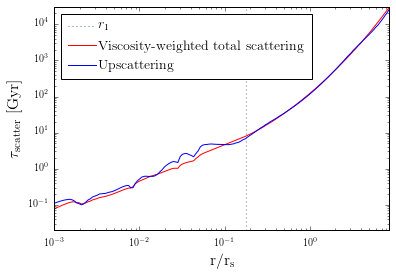

In [244]:
Mi=1e9
zi=1.
mH, alpha, Ehf10=80., 0.02, -5  # mH [GeV], alpha, log10(Ehf/E0)

plot_tscatter_vs_r(dataRec_m, Mi, zi, mH, alpha, Ehf10)

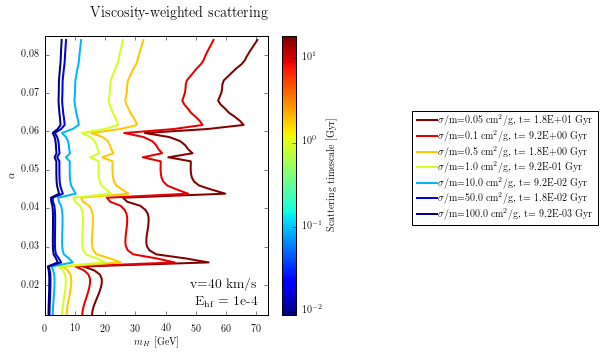

In [213]:
v=40*ap.km_per_sec
rho=.07 * 2.e33 * (1000.)**3 / (ap.kpc2cm**3)   #initially given in solar mass/pc^3
sigM_arr=np.array([0.05,0.1, 0.5, 1., 10, 50, 100])

plot_timescales(dataRec_m, -4, sigM_arr, v, rho, sig_type='total')

# legend showing for temporary check to make sure color map is correct

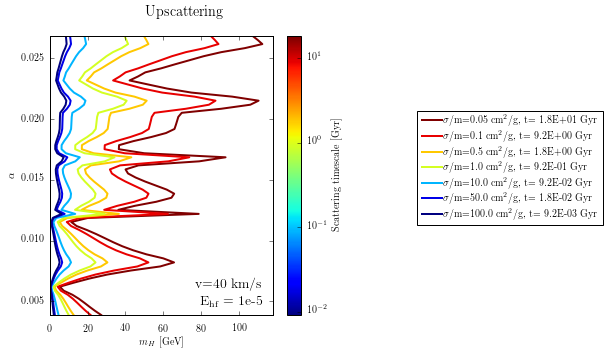

In [214]:
v=40*ap.km_per_sec
rho=.07 * 2.e33 * (1000.)**3 / (ap.kpc2cm**3)   #initially given in solar mass/pc^3
sigM_arr=np.array([0.05,0.1, 0.5, 1., 10, 50, 100])
#sigM_arr=np.linspace(0.01,0.10,10)
#ap.sidm_mass_arr(sigM_arr, dataRec_m_old,alpha,v,Ehf10)
plot_timescales(dataRec_m, -5, sigM_arr, v, rho, sig_type='inelastic')

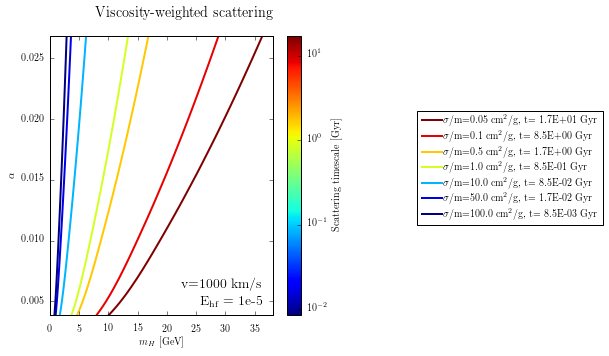

In [245]:
v=1000*ap.km_per_sec
rho=.3e-2 * 2.e33 * (1000.)**3 / (ap.kpc2cm**3)   #initially given in solar mass/pc^3
sigM_arr=np.array([0.05,0.1, 0.5, 1., 10, 50, 100])
#sigM_arr=np.linspace(0.01,0.10,10)
#ap.sidm_mass_arr(sigM_arr, dataRec_m_old,alpha,v,Ehf10)
plot_timescales(dataRec_m, -5, sigM_arr, v, rho, sig_type='total')

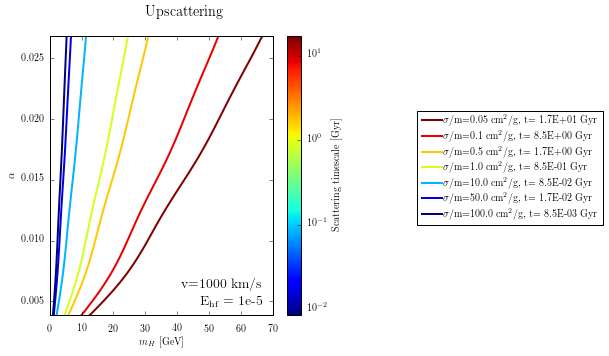

In [246]:
v=1000*ap.km_per_sec
rho=.3e-2 * 2.e33 * (1000.)**3 / (ap.kpc2cm**3)   #initially given in solar mass/pc^3
sigM_arr=np.array([0.05,0.1, 0.5, 1., 10, 50, 100])
#sigM_arr=np.linspace(0.01,0.10,10)
#ap.sidm_mass_arr(sigM_arr, dataRec_m_old,alpha,v,Ehf10)
plot_timescales(dataRec_m, -5, sigM_arr, v, rho, sig_type='inelastic')

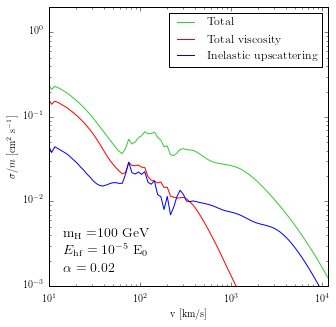

In [247]:
mH, alpha, Ehf10 = 100., 0.02, -5  # mH [GeV], alpha, log10(Ehf/E0)
plot_sigmaM(dataRec_m, mH, alpha, Ehf10)

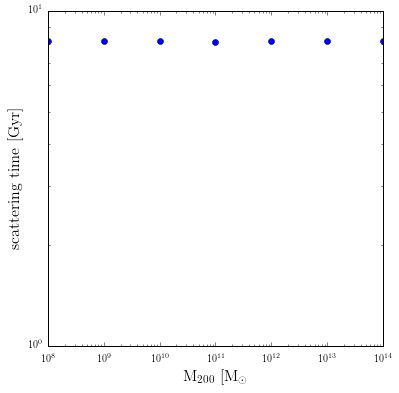

In [226]:
plot_core_scattering_times(dataRec_m, zi, mH, alpha, Ehf10, Mmin=1e8, Mmax=1e14)